<h4><font color='gray'>Set Env</font></h4>

In [12]:
# import standard packages
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# suppress warnings
warnings.filterwarnings('ignore')

# adjust dataframe demonstration options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

<h4><font color='gray'>Set Config</font></h4>

In [18]:
# store parameters
class C:
    TARGET_VARIABLE = 'churn'
    CURRENT_DIRECTORY = os.getcwd()

<h4><font color='gray'>Load Dataframe</font></h4>

In [15]:
# load dataframe
df_path = os.path.join(C.CURRENT_DIRECTORY, 'telecom_customer_churn.csv')
telecom_customer_churn = pd.read_csv(df_path)

# copy dataframe
df = telecom_customer_churn.copy()

<h4><font color='gray'>Display Dataframe</font></h4>

In [5]:
# display random rows
df.sample(10)

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
34851,66.6575,348.75,49.9900,6.6825,0.00,0.0000,0.0000,0.0000,0.0000,-94.75,-12.4975,12.333333,0.0,3.000000,0.0,46.333333,0.0,216.333333,0.0,25.666667,0.0,155.333333,0.0,0.333333,3.000000,2.943333,17.666667,1.000000,142.590000,0.0,25.246667,27.000000,20.036667,0.000000,0.000000,109.333333,0.0,112.736667,0.0,63.333333,0.0,55.096667,0.0,15.333333,216.333333,155.333333,0.0,0.666667,0,20,1,1,U,BA,N,3965,7044.0,1268.16,1211.33,6958.0,3919,63.75,366.21,206.26,380,223,71,373.0,212.0,68.0,S,NEW ENGLAND AREA,Y,N,129.989990,2.0,1.0,WCMB,0.0,0.0,O,4.0,M,S,2.0,M,6.0,NaN,C,B,0.0,F,U,U,U,U,U,Y,110.0,1034852
34402,30.7275,137.50,29.9900,0.0000,0.00,0.0000,0.0000,0.0000,0.7375,50.50,-0.3475,1.333333,0.0,0.000000,0.0,8.333333,0.0,48.333333,0.0,33.333333,0.0,39.333333,0.0,0.000000,0.000000,0.000000,21.333333,0.000000,47.390000,0.0,45.970000,16.666667,13.163333,11.666667,13.080000,15.666667,0.0,31.720000,0.0,53.666667,0.0,61.640000,0.0,1.333333,48.333333,39.333333,0.0,0.666667,0,20,1,1,U,BA,N,2172,5338.0,753.82,722.86,5320.0,2165,38.05,280.00,113.95,121,77,31,141.0,85.0,31.0,S,NEW ENGLAND AREA,Y,R,39.989990,1.0,1.0,WCMB,0.0,0.0,NaN,4.0,M,S,5.0,M,3.0,1.0,NaN,B,0.0,O,U,U,U,U,U,Y,611.0,1034403
7791,107.1600,603.25,32.4900,1.7325,294.25,73.5625,73.5625,0.0000,0.9950,-603.25,-76.2900,13.333333,0.0,0.000000,0.0,47.333333,0.0,212.000000,0.0,39.666667,0.0,152.333333,0.0,0.000000,0.000000,0.000000,20.666667,0.333333,357.170000,0.0,83.463333,19.666667,14.956667,2.333333,2.513333,145.000000,0.0,372.690000,0.0,35.000000,0.0,67.946667,0.0,13.333333,212.000000,152.333333,0.0,1.666667,0,33,2,2,N,A,N,5422,16402.0,2457.74,2398.28,16252.0,5384,77.36,524.26,173.68,804,274,133,707.0,237.0,109.0,S,NEW ENGLAND AREA,Y,N,29.989990,2.0,2.0,WC,0.0,0.0,O,1.0,NaN,U,2.0,M,9.0,2.0,C,NaN,0.0,S,U,U,U,U,U,Y,986.0,1007792
50902,67.6100,1182.25,44.9900,3.2175,83.75,29.4025,28.5250,0.8775,0.0000,285.75,84.4500,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1,15,1,1,Y,AA,N,2572,7572.0,1081.32,1011.34,7533.0,2550,72.24,538.07,182.14,1087,242,39,728.0,169.0,39.0,S,DC/MARYLAND/VIRGINIA AREA,Y,R,99.989990,2.0,2.0,WCMB,0.0,0.0,O,2.0,S,B,1.0,M,6.0,2.0,C,A,0.0,N,U,U,U,U,Y,Y,326.0,1050903
12218,62.0700,576.25,50.0000,0.2475,43.00,12.9000,12.9000,0.0000,0.0975,-127.25,-18.5700,4.333333,0.0,5.000000,0.0,34.666667,0.0,202.333333,0.0,90.333333,0.0,159.666667,0.0,0.000000,0.000000,0.000000,44.000000,0.000000,202.456667,0.0,134.416667,11.666667,11.156667,3.000000,12.533333,217.000000,0.0,303.450000,0.0,31.666667,0.0,33.423333,0.0,9.333333,202.333333,159.666667,0.0,5.000000,0,27,1,1,U,A,N,6285,10950.0,1444.16,1379.17,10839.0,6205,55.17,433.56,248.20,619,360,68,578.0,327.0,63.0,U,HOUSTON AREA,Y,N,29.989990,2.0,2.0,NaN,1.0,0.0,O,6.0,S,M

<h4><font color='gray'>Specify Dataframe Features</font></h4>

In [6]:
# demonstrate structural parameters
print(f'Dataframe Shape: {df.shape}')
print(f'Datatype Distribution: {dict(df.dtypes.value_counts())}')

Dataframe Shape: (100000, 100)
Datatype Distribution: {dtype('float64'): 69, dtype('O'): 21, dtype('int64'): 10}


In [7]:
# show memory usage
units = ['B', 'KB', 'MB', 'GB', 'TB', 'PB']
memory_usage = df.memory_usage(deep=True).sum()
for unit in units:
    if memory_usage < 1024:
        break
    memory_usage /= 1024
print(f"Memory Usage: {round(memory_usage,4)}{unit}")

Memory Usage: 173.4097MB


In [8]:
# validate primary key
n_entity = df.shape[0]
primary_key_columns = [column for column in df.columns if df[column].nunique() == n_entity]
print(f"The primary key column(s) is/are: {', '.join(primary_key_columns)}")

The primary key column(s) is/are: Customer_ID


In [9]:
# find duplicated rows
df.duplicated().any()

False

<h4><font color='gray'>Explore Target Variable</font></h4>

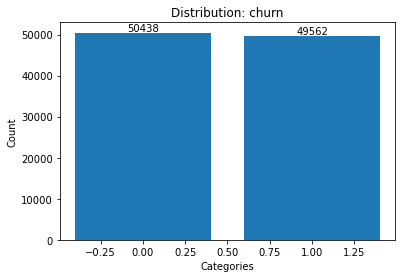

In [29]:
# observe distribution
value_counts = df[C.TARGET_VARIABLE].value_counts()
plt.bar(value_counts.index, value_counts)

# annotate each bar with its value count
for i, count in enumerate(value_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# add title and labels
plt.title(f'Distribution: {C.TARGET_VARIABLE}')
plt.xlabel('Categories')
plt.ylabel('Count')

# show the plot
plt.show()

<h4><font color='gray'>Observe Missing Values</font></h4>

In [10]:
# show null ratio for each column
threshold = 0
null_ratios = round(df.isnull().sum()*100/df.shape[0],4).sort_values(ascending=False)
print(f'Null Ratios\n{null_ratios[null_ratios > threshold]}')

Null Ratios
numbcars            49.366
dwllsize            38.308
HHstatin            37.923
ownrent             33.706
dwlltype            31.909
lor                 30.190
income              25.436
adults              23.019
infobase            22.079
hnd_webcap          10.189
prizm_social_one     7.388
avg6rev              2.839
avg6mou              2.839
avg6qty              2.839
ethnic               1.732
rv                   1.732
marital              1.732
forgntvl             1.732
kid0_2               1.732
kid3_5               1.732
kid6_10              1.732
kid16_17             1.732
creditcd             1.732
truck                1.732
kid11_15             1.732
change_rev           0.891
change_mou           0.891
hnd_price            0.847
mou_Mean             0.357
rev_Mean             0.357
da_Mean              0.357
datovr_Mean          0.357
totmrc_Mean          0.357
ovrmou_Mean          0.357
ovrrev_Mean          0.357
vceovr_Mean          0.357
roam_Mean       

In [31]:
# leverage hypothesis test to find columns which need to be dropped
def perform_hypothesis_test(df, target_column, evaluated_column, alpha=0.05):
    first_group = df[df[evaluated_column].notna()][target_column]
    second_group = df[df[evaluated_column].isna()][target_column]

    stat, p_value = ttest_ind(first_group, second_group, equal_var = False)

    return p_value < alpha

def find_mv_drop_list(df, target_column, drop_rate=0.7, alpha=0.05):
    columns_to_drop = []
    missing_percentages = (df.isnull().sum() / df.shape[0]) * 100

    for column in df.columns:
        if missing_percentages[column] < drop_rate:
            continue
    
        # perform hypothesis test
        effect = perform_hypothesis_test(df, target_column, column, alpha)

        # append column into the list if it has a statistical effect
        if effect:
            columns_to_drop.append(column)
            
    return columns_to_drop

mv_drop_list = find_mv_drop_list(df, target_column=C.TARGET_VARIABLE)
print(f'These columns should be dropped: {mv_drop_list}')

These columns should be dropped: ['change_mou', 'change_rev', 'avg6mou', 'avg6qty', 'avg6rev', 'prizm_social_one', 'hnd_price', 'hnd_webcap', 'ownrent', 'lor', 'dwlltype', 'adults', 'infobase', 'income', 'numbcars', 'HHstatin', 'dwllsize']


<h4><font color='gray'>Observe Missing Values</font></h4>